In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import itertools
from DMT_functions import *
from utility_functions import *


In [23]:
df = pd.read_csv('tables/preprocessed/non_imputed.csv')
df = df.drop(columns=["date"])

nans_preview = nan_exploration(df, create_pivot=False)
nans_preview


df_nan renamed


,level_0,variable,nan_percentage,nan_count,unique_values,zero_count,zero_percent,participant
354,354,appCat.office,1.0,54,0,0,0.0,16
156,156,appCat.finance,1.0,48,0,0,0.0,7
500,500,appCat.weather,1.0,56,0,0,0.0,24
633,633,appCat.game,1.0,44,0,0,0.0,29
444,444,appCat.weather,1.0,47,0,0,0.0,20
...,...,...,...,...,...,...,...,...
361,361,day,0.0,0,54,0,0.0,16
336,336,id_num,0.0,0,1,0,0.0,16
333,333,day,0.0,0,56,0,0.0,15
308,308,id_num,0.0,0,1,0,0.0,15


### Transformations

/Users/urbansirca/Desktop/FAX/Master's AI/Data Mining/DMT/utility_functions.py:251: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


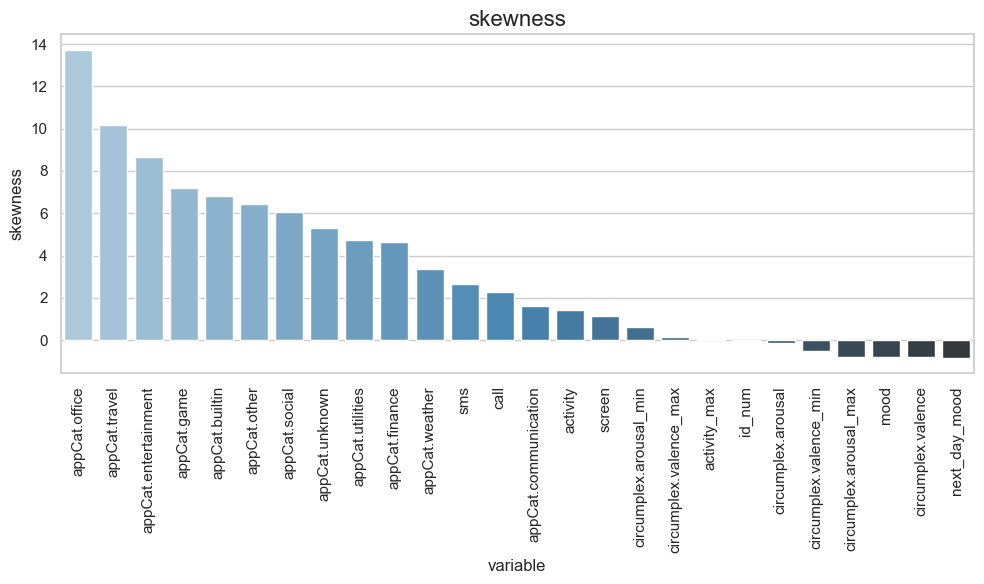

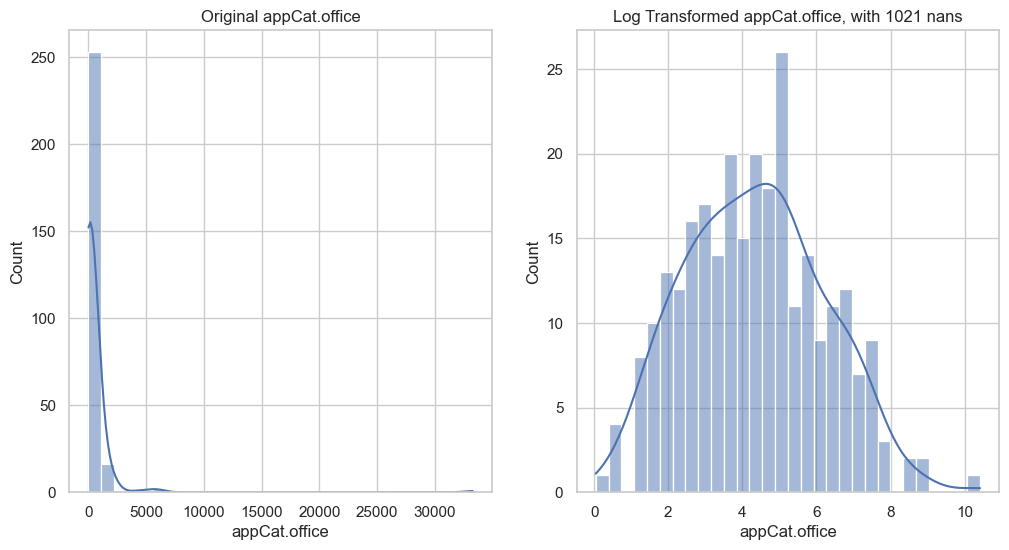

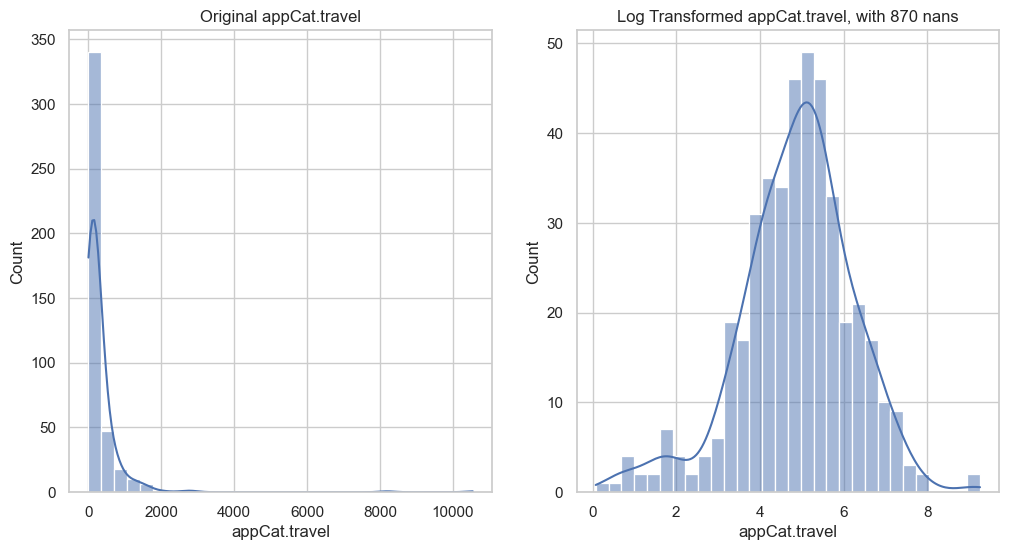

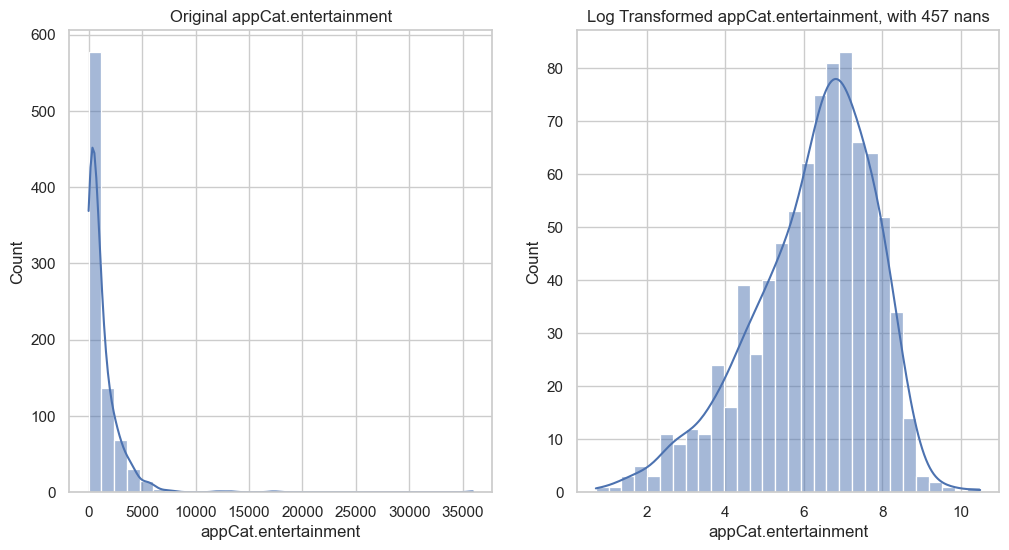

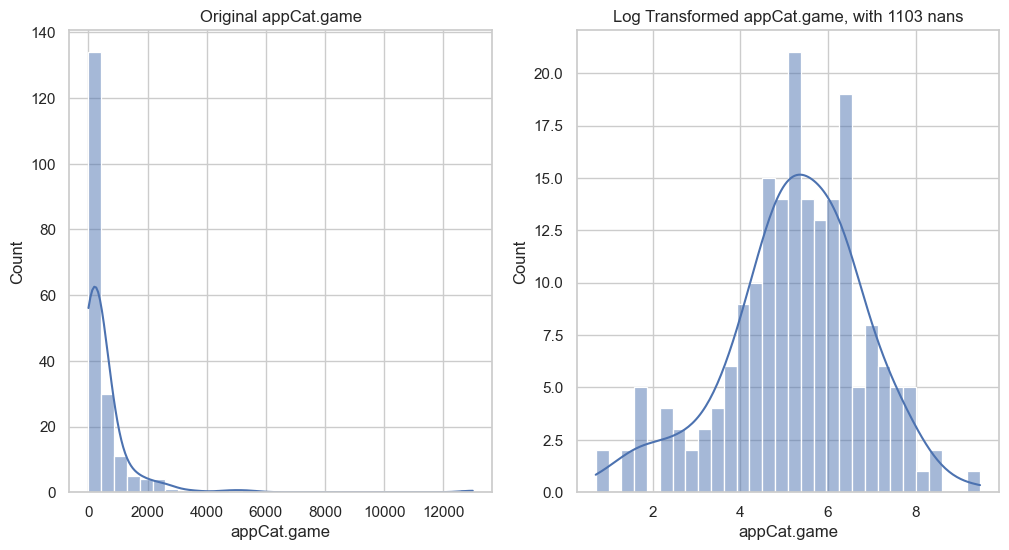

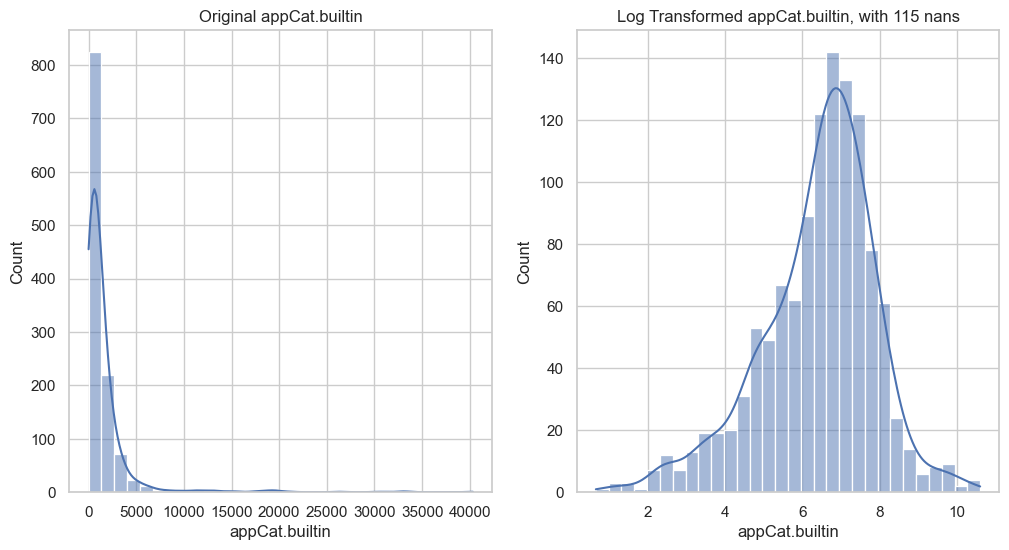

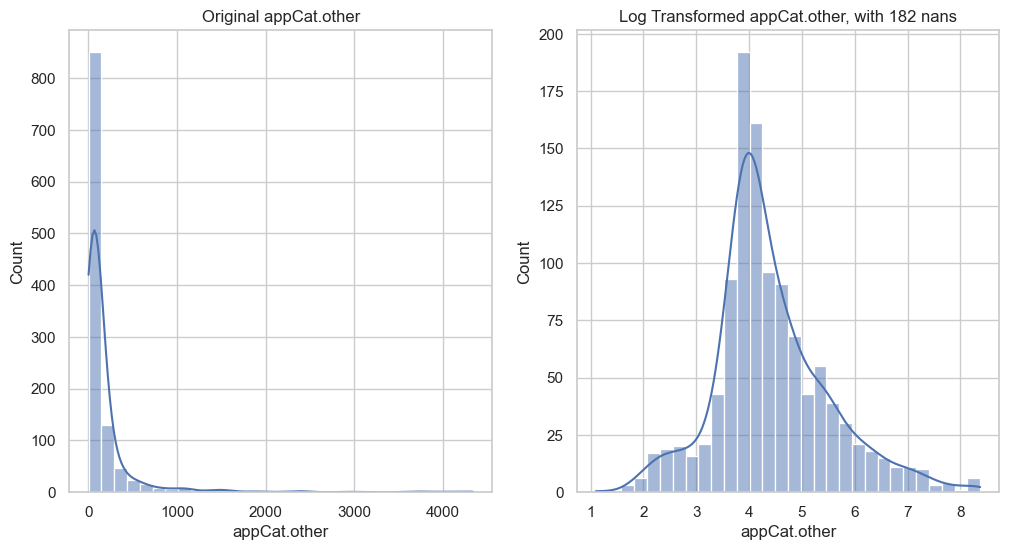

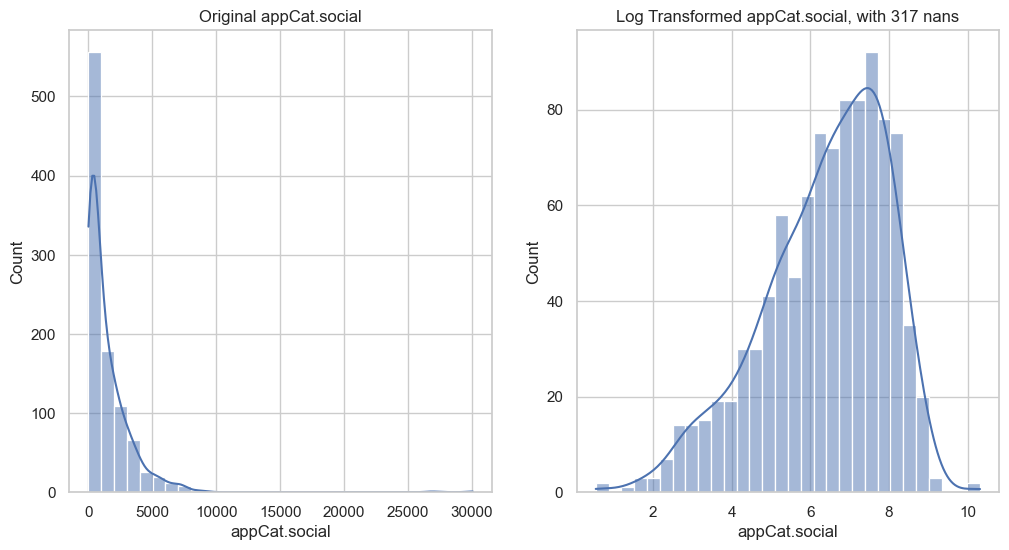

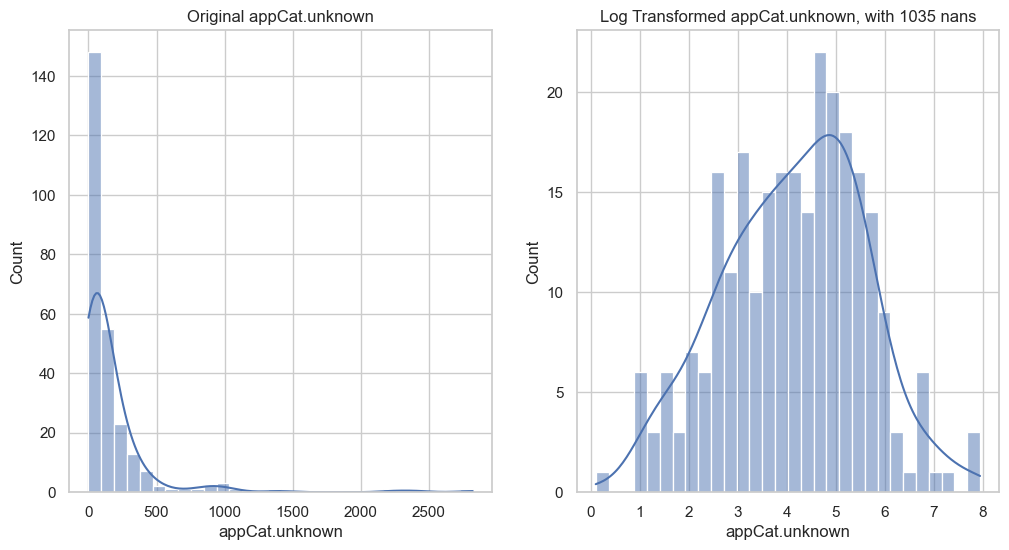

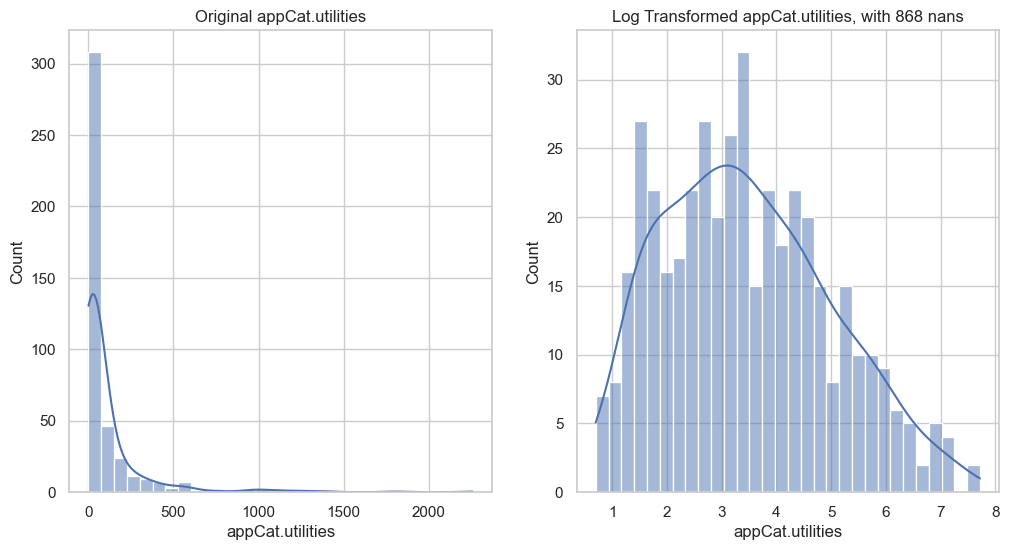

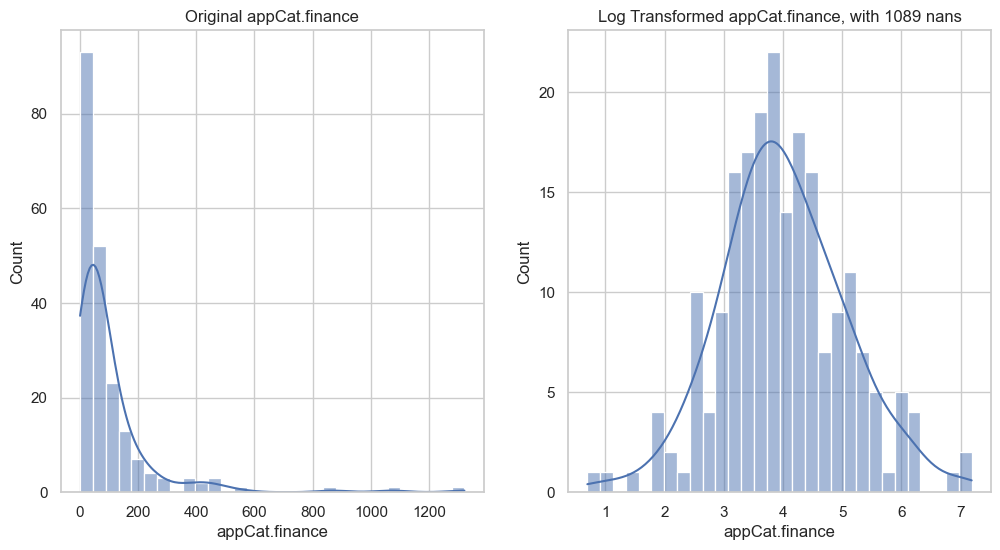

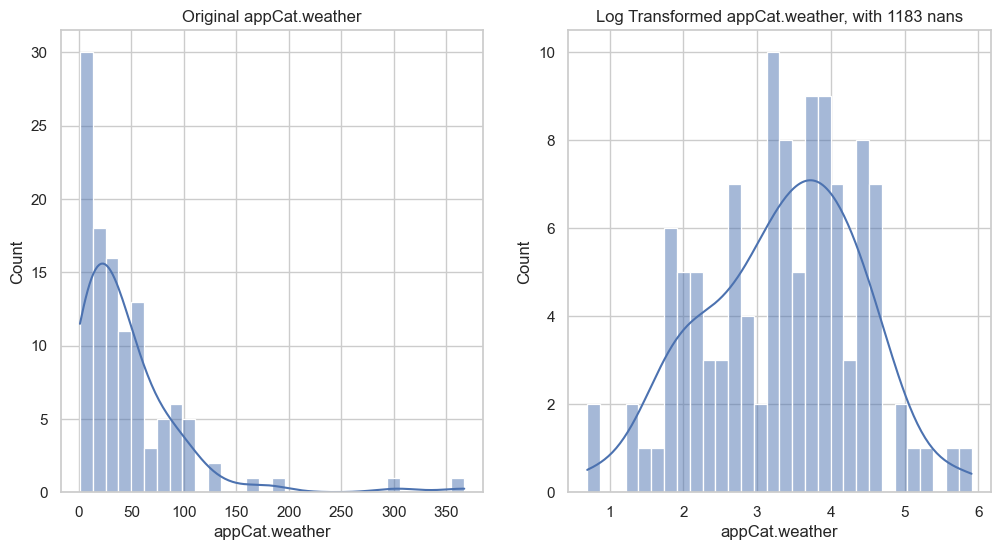

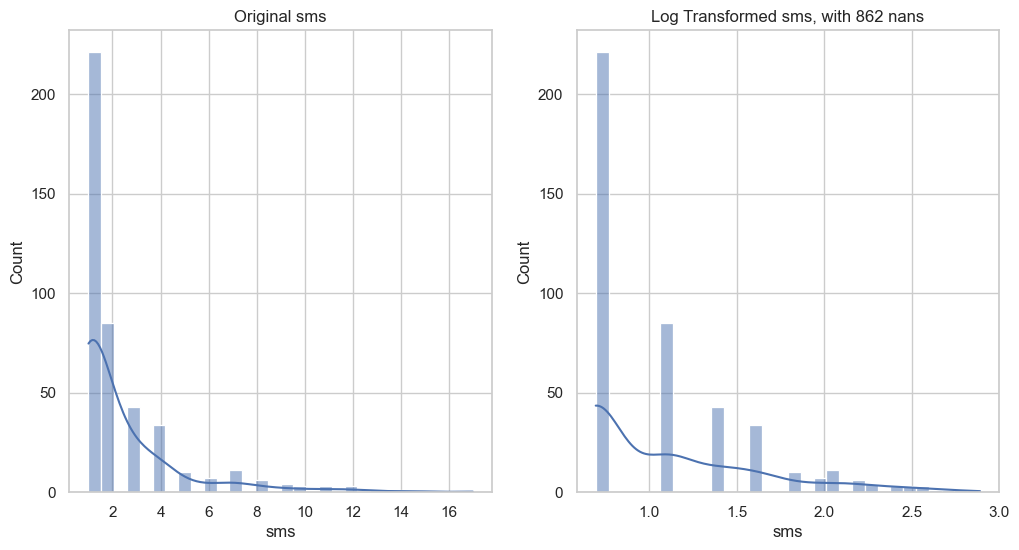

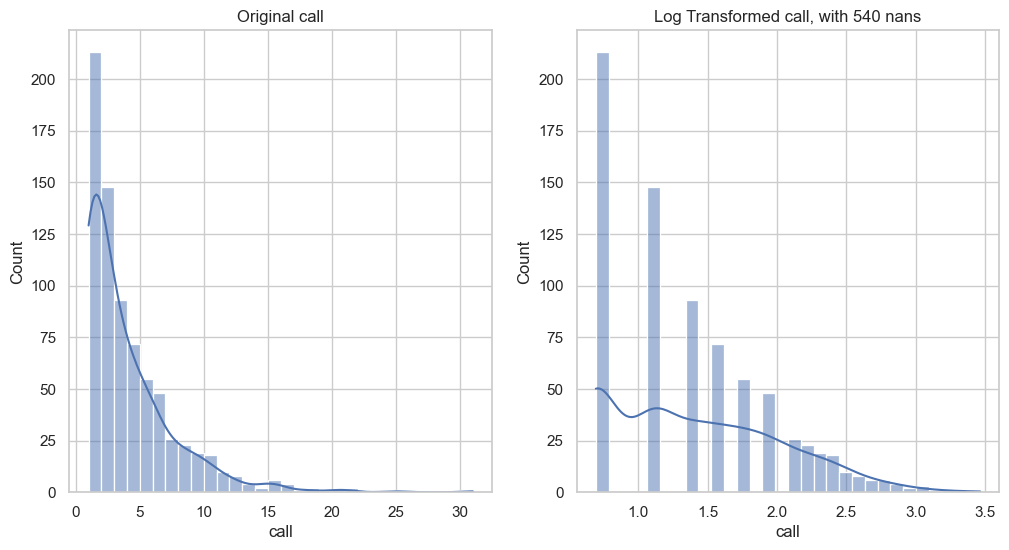

In [24]:

numerical_df = df.select_dtypes(include=[np.number])
plot_skewness_pyplot(numerical_df=numerical_df)

# function to plot the original and transformed data side by side

def plot_original_vs_transformed(data, column_name):
    # transform the data
    transformed_data = data.copy()
    transformed_data[column_name] = np.log1p(data[column_name])

    # count nans for that feature
    nans_count = data[column_name].isna().sum()

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.histplot(data[column_name], bins=30, kde=True, ax=ax[0])
    ax[0].set_title(f'Original {column_name}')
    sns.histplot(transformed_data[column_name], bins=30, kde=True, ax=ax[1])
    ax[1].set_title(f'Log Transformed {column_name}, with {nans_count} nans')
    plt.show()

plot_original_vs_transformed(data=df, column_name='appCat.office')
plot_original_vs_transformed(data=df, column_name='appCat.travel')
plot_original_vs_transformed(data=df, column_name='appCat.entertainment')
plot_original_vs_transformed(data=df, column_name='appCat.game')
plot_original_vs_transformed(data=df, column_name='appCat.builtin')
plot_original_vs_transformed(data=df, column_name='appCat.other')
plot_original_vs_transformed(data=df, column_name='appCat.social')
plot_original_vs_transformed(data=df, column_name='appCat.unknown')
plot_original_vs_transformed(data=df, column_name='appCat.utilities')
plot_original_vs_transformed(data=df, column_name='appCat.finance')
plot_original_vs_transformed(data=df, column_name='appCat.weather')
plot_original_vs_transformed(data=df, column_name='sms')
plot_original_vs_transformed(data=df, column_name='call')


/Users/urbansirca/Desktop/FAX/Master's AI/Data Mining/DMT/utility_functions.py:251: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


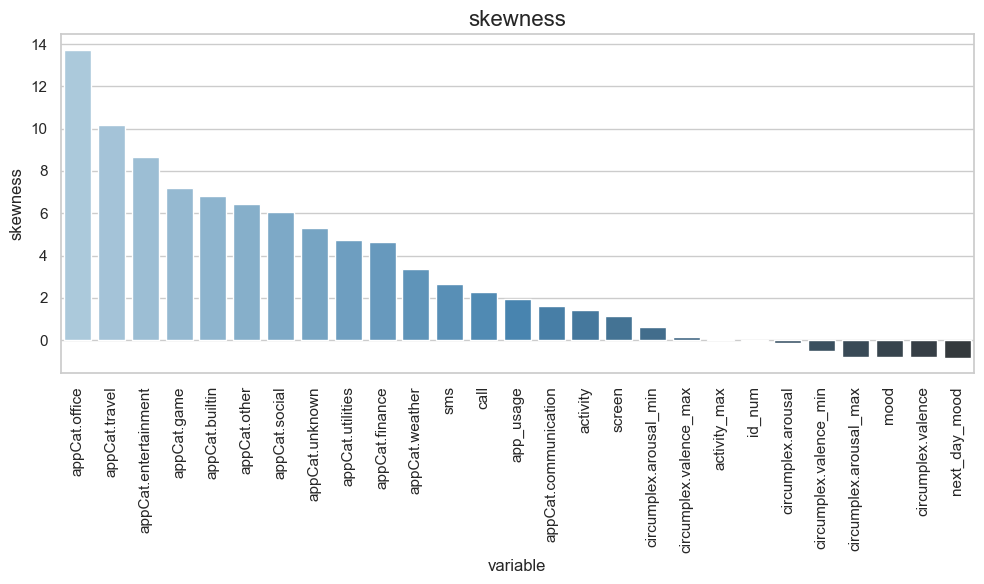

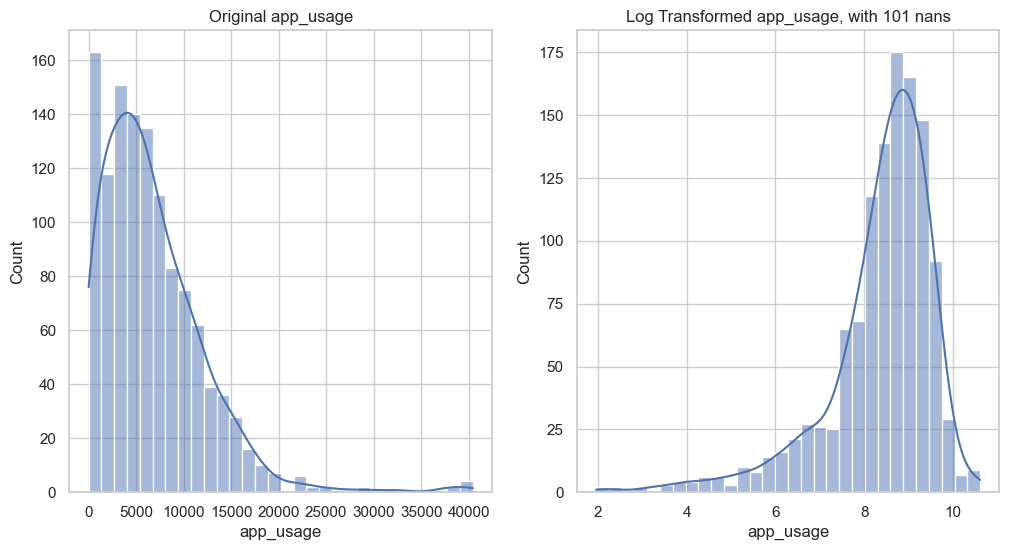

df_nan renamed


{'appCat.builtin': 0,
 'appCat.communication': 0,
 'appCat.entertainment': 0,
 'appCat.finance': 0,
 'appCat.game': 0,
 'appCat.office': 0,
 'appCat.other': 0,
 'appCat.social': 0,
 'appCat.travel': 0,
 'appCat.unknown': 0,
 'appCat.utilities': 0,
 'appCat.weather': 0,
 'app_usage': 0}

In [27]:
appCat_columns = [c for c in df.columns if c.startswith('appCat')]

# sum all appCat columns
df['app_usage'] = df[appCat_columns].sum(axis=1, min_count=1) # min count is for nans
# plot the distribution of the new column

numerical_df = df.select_dtypes(include=[np.number])
plot_skewness_pyplot(numerical_df)
# transform the data
plot_original_vs_transformed(data=df, column_name='app_usage')

nan_exploration(df, create_pivot=False, title="combined_app_usage")

# count zeros for all appCat columns
def count_zeros(df, columns):
    zero_counts = {}
    for col in columns:
        zero_counts[col] = int((df[col] == 0).sum())
    return zero_counts
count_zeros(numerical_df, appCat_columns + ['app_usage'])
